In [8]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Loading in the results

In [28]:
dataframes = []

folder_path = '../data/model_results'
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframes.append(df)

merged_df = pd.concat(dataframes)
merged_df        

,model_name,accuracy,recall,BER
0,FLAN-T5,0.636364,0.375000,0.371324
0,scibert,0.703704,0.769231,0.299451
0,Logistic Regression,0.851852,0.937500,0.167614
1,Naive Bayes,0.814815,0.937500,0.213068
2,SVM,0.814815,0.937500,0.213068
3,Random Forest,0.888889,0.937500,0.122159
4,XGBoost,0.851852,0.875000,0.153409


## Comparing the models

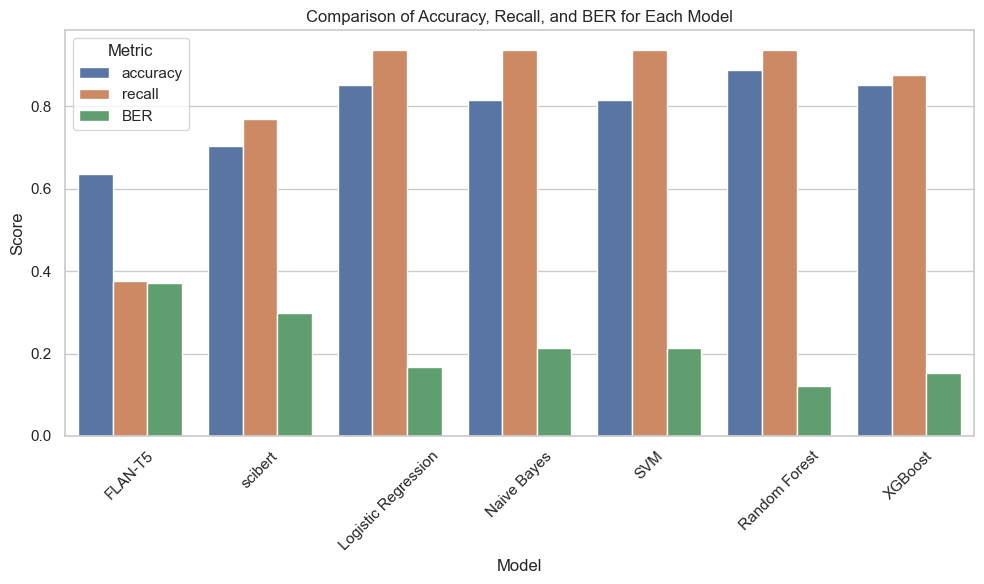

In [29]:
df_melted = merged_df.melt(id_vars="model_name", value_vars=["accuracy", "recall", "BER"], 
                    var_name="Metric", value_name="Value")

# creates grouped plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="model_name", y="Value", hue="Metric")

# axis and title labels
plt.title("Comparison of Accuracy, Recall, and BER for Each Model")
plt.xlabel("Model")
plt.ylabel("Score")

# showing plot + adding legend
plt.legend(title="Metric")
plt.xticks(rotation=45)  # Rotate model names if needed for readability
plt.tight_layout()
plt.show()